<a href="https://colab.research.google.com/github/riobagas02/Machine-Learning/blob/Week4/Praktikum1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Praktikum 1

In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

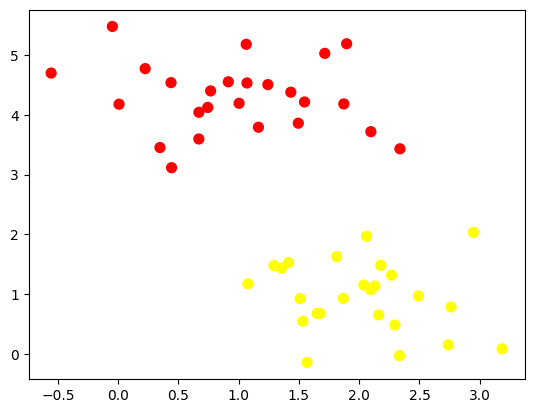

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

(-1.0, 3.5)

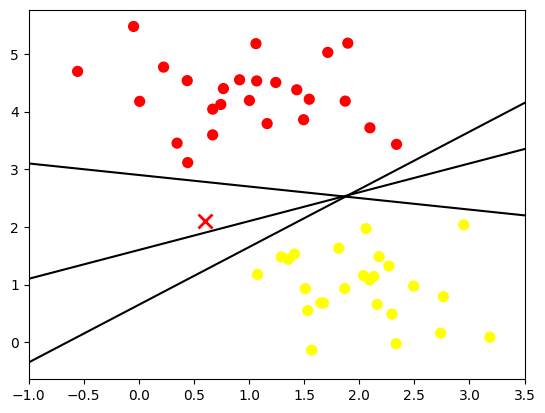

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

(-1.0, 3.5)

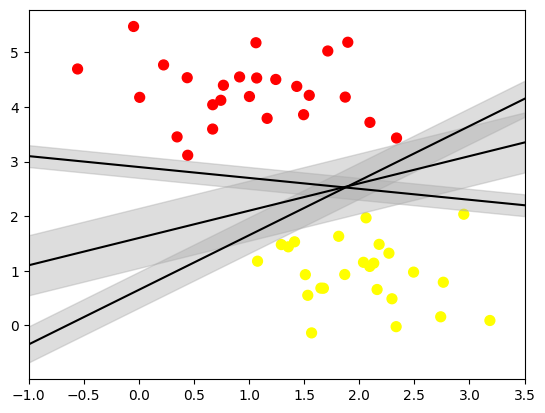

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

In [5]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [6]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

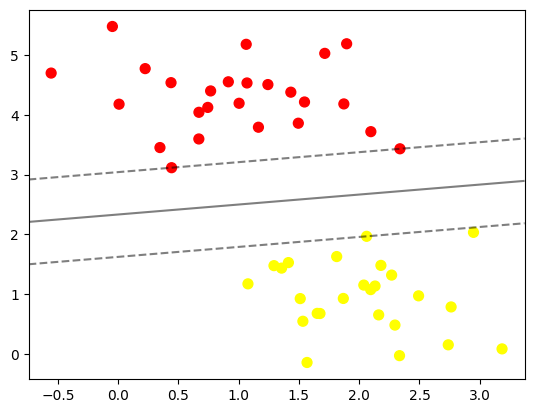

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [9]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

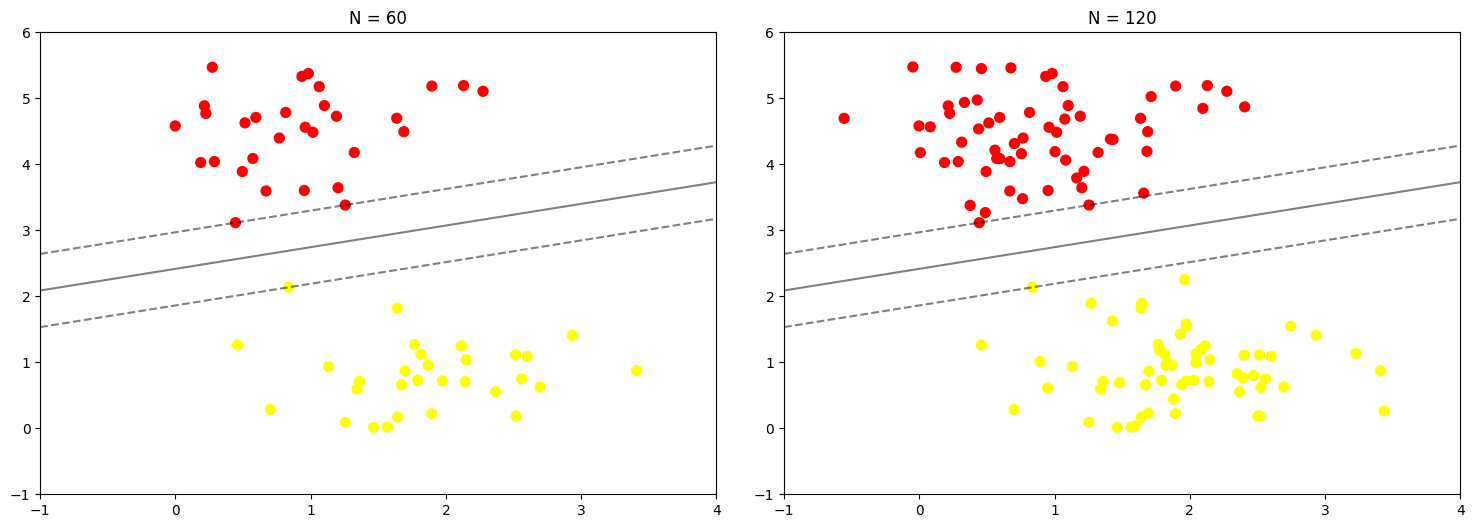

In [10]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

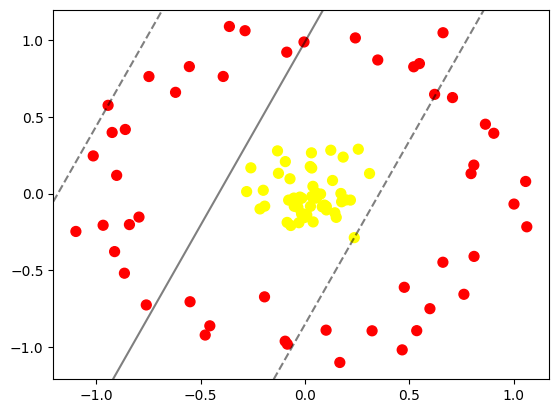

In [11]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [24]:
r = np.exp(-(X ** 2).sum(1))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-1.93391133e-01, -8.16888274e-02],
       [-1.69994051e-02, -1.31584725e-01],
       [ 2.35650136e-01, -2.86640816e-01],
       [-2.87534425e-01,  1.05939426e+00],
       [ 5.11219334e-02,  5.64819819e-03],
       [ 7.60808503e-01, -6.55059060e-01],
       [ 5.47660363e-01,  8.45414717e-01],
       [ 6.60747877e-01,  1.04621247e+00],
       [-9.04704682e-03, -1.32485636e-01],
       [-3.43723773e-02, -9.00679513e-02],
       [-1.27513720e-01,  1.31769799e-01],
       [-9.45174161e-02,  2.08073051e-01],
       [ 3.04656506e-02,  2.65006288e-01],
       [ 1.02154323e-01, -1.06345067e-01],
       [-7.87012522e-02, -4.23999360e-02],
       [ 5.12998447e-02, -2.94178973e-02],
       [ 4.65171944e-01, -1.01647150e+00],
       [ 1.66452676e-01, -1.09850536e+00],
       [-8.58885760e-02, -1.87577719e-01],
       [ 4.75162954e-01, -6.09526502e-01],
       [-5.54357606e-01,  8.26014856e-01],
       [-3.66794288e-02, -5.34211481e-02],
       [-4.56244771e-01, -8.60102031e-01],
       [-1.09779093e+00, -2.46335244e-01],
       [ 1.96656314e-01, -4.10942473e-02],
       [ 8.22210484e-02, -8.58871465e-02],
       [-2.59745934e-01,  1.67478622e-01],
       [ 3.08797854e-01,  1.30561940e-01],
       [ 9.27752245e-02, -7.46578148e-02],
       [ 8.63733741e-01,  4.51089005e-01],
       [ 3.85872627e-02, -1.84241014e-01],
       [ 6.60152231e-01, -4.46617526e-01],
       [-2.95289605e-02, -1.89514996e-01],
       [ 9.03941840e-01,  3.92268345e-01],
       [-8.61132235e-01,  4.16975713e-01],
       [ 2.40809911e-01,  1.01250229e+00],
       [ 1.06205323e+00, -2.16064534e-01],
       [-8.77162073e-02,  9.19752065e-01],
       [ 1.49277802e-01, -1.54626249e-01],
       [ 1.05660879e+00,  7.88668480e-02],
       [-5.18933472e-02, -8.25191137e-02],
       [-9.67379899e-01, -2.06063104e-01],
       [-1.32014335e-01,  2.77814038e-01],
       [-7.47852342e-01,  7.61360090e-01],
       [ 8.08344107e-01,  1.85261661e-01],
       [-6.20443744e-01,  6.58471241e-01],
       [ 1.23168473e-01,  2.82090700e-01],
       [-6.84628968e-02, -2.07711895e-01],
       [-7.60615120e-01, -7.24267839e-01],
       [-9.12378087e-01, -3.77384607e-01],
       [ 3.75539210e-02,  4.72080379e-02],
       [-8.65352643e-01, -5.17885238e-01],
       [-3.14217218e-03, -1.55913953e-01],
       [ 2.47815179e-02,  1.75925899e-01],
       [ 7.95042298e-01,  1.30021103e-01],
       [-5.50953957e-01, -7.03510735e-01],
       [-5.35745308e-02, -2.92121177e-02],
       [ 3.20926476e-01, -8.92542400e-01],
       [ 1.71562946e-01,  6.60962958e-04],
       [ 3.48128016e-01,  8.68942967e-01],
       [-1.56290119e-02, -3.00707694e-02],
       [ 7.06175204e-01,  6.24441693e-01],
       [ 1.82393548e-01,  2.37304584e-01],
       [-9.53554069e-02, -9.60119044e-01],
       [-1.94265567e-01, -6.71692004e-01],
       [-9.24141196e-01,  3.97485382e-01],
       [ 5.34815668e-01, -8.91503934e-01],
       [ 3.21431344e-02, -1.85381656e-02],
       [ 8.09352698e-01, -4.08606810e-01],
       [ 2.54866738e-01,  2.88649127e-01],
       [-3.92157200e-01,  7.61754917e-01],
       [ 5.98001899e-01, -7.48614608e-01],
       [ 1.74944766e-01, -5.32395661e-02],
       [-9.02487353e-01,  1.18438039e-01],
       [ 1.31504729e-01,  8.51785012e-02],
       [-3.62547764e-01,  1.08685459e+00],
       [ 1.00662332e-01, -8.88377738e-01],
       [ 5.20425538e-01,  8.24654063e-01],
       [-8.50157566e-02, -9.79208720e-01],
       [-2.45937157e-02, -2.27878024e-02],
       [ 8.13473397e-03, -1.38898909e-01],
       [-4.78426224e-01, -9.20078985e-01],
       [-2.15811811e-01, -9.98033724e-02],
       [-1.01471732e+00,  2.45038421e-01],
       [-7.22308921e-02,  9.62991781e-02],
       [-7.95572427e-01, -1.52845830e-01],
       [ 7.42537185e-02, -2.89199677e-03],
       [ 1.01778244e-01, -8.38780594e-02],
       [ 3.18709862e-02,  1.66346945e-01],
       [-8.41357133e-01, -2.01702662e-01],
       [ 6.20511837e-01,  6.45301868e-01],
       [ 5.62400154e-02, -2.54225956e-02

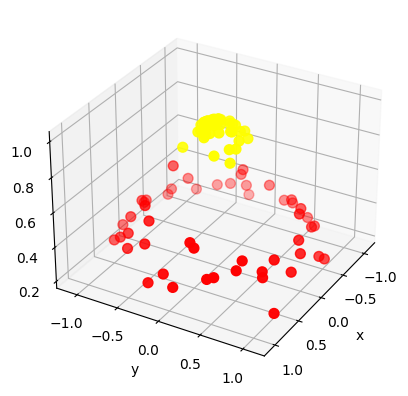

In [25]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

In [27]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

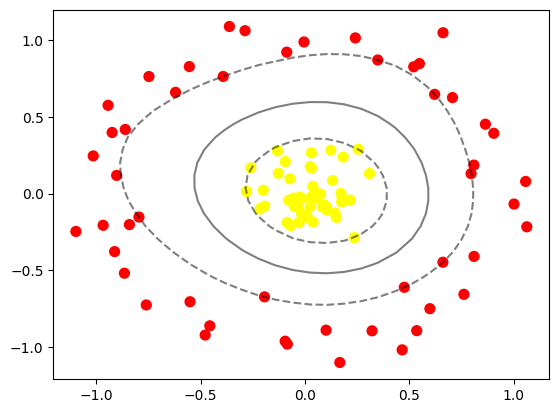

In [28]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

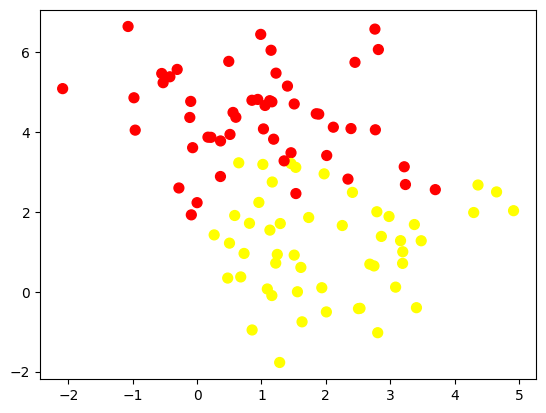

In [29]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

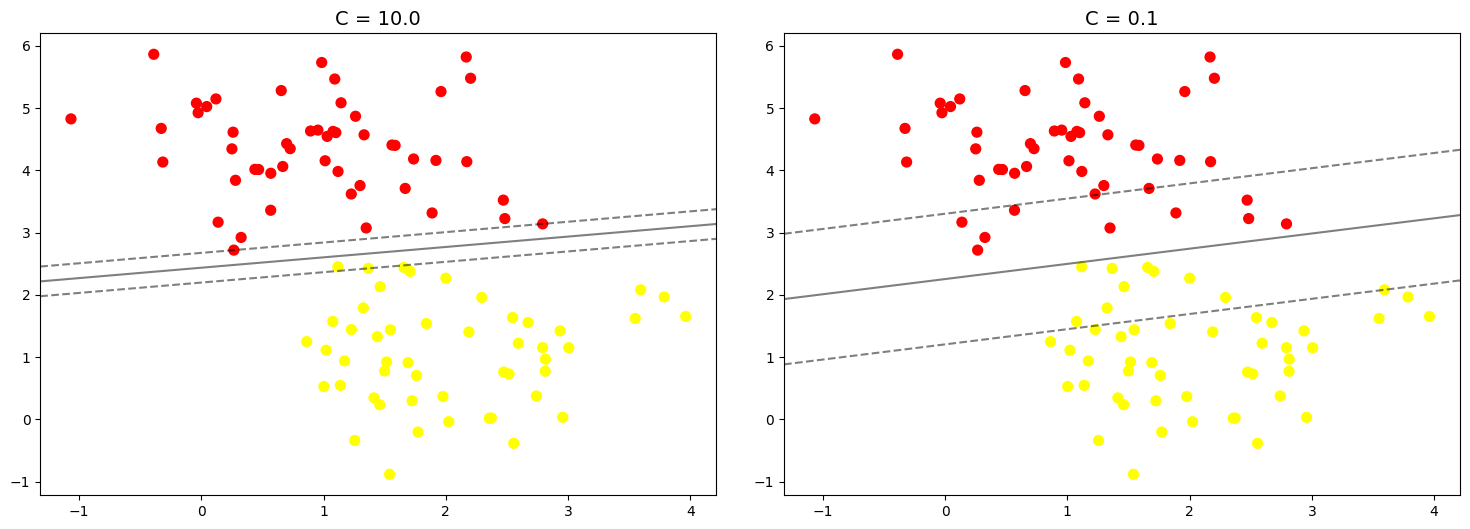

In [30]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)